In [2]:
#  creating own ml model to classify  the images





import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

#avoid OOM errors by setting GPU Memory Consumption Growth
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


In [3]:
import cv2
import imghdr

train_data= 'dataset/training_set'
val_data= 'dataset/validation_set'
# os.listdir(train_data)



#  loading data
train_dataset = tf.keras.utils.image_dataset_from_directory(train_data)

C:\Users\Raj\AppData\Local\Temp\ipykernel_17608\2141659994.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


Found 2692 files belonging to 3 classes.


85

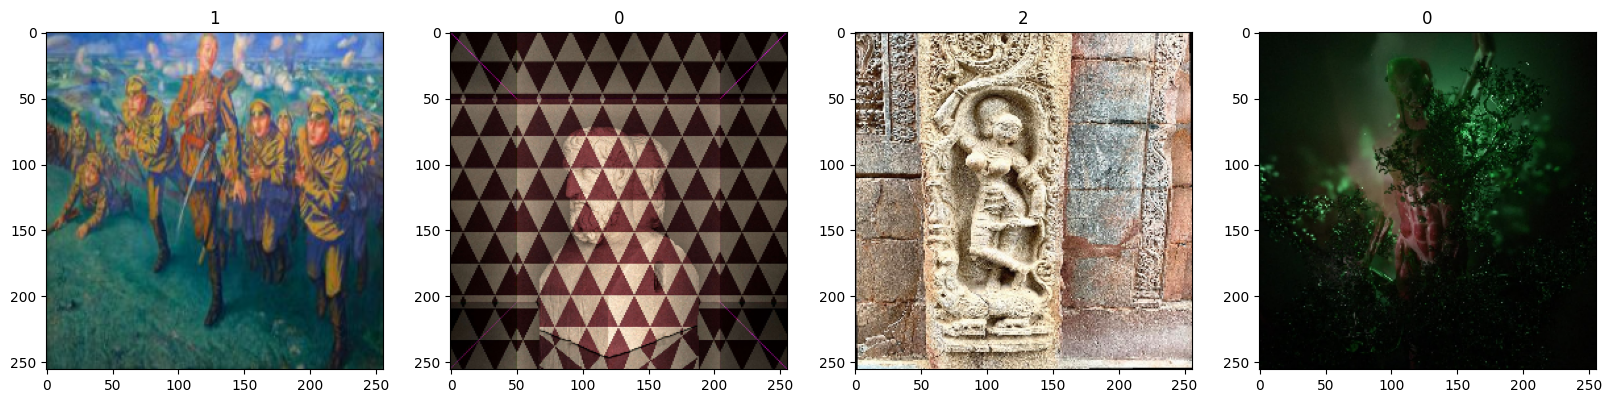

In [4]:


#  scaleing data btw 0 and 1
train_dataset=train_dataset.map(lambda x,y: (x/255,y))
scaled_iterator=train_dataset.as_numpy_iterator()
batch= scaled_iterator.next()





fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])




batch[0].min()  # checking whether data is sacled btw 1 and 0 or not
len(train_dataset)


In [5]:

#  splitting the data into the train test and validation one
train_size=int(len(train_dataset)*.7)
val_size=int(len(train_dataset)*.2)+1  # eval model while training
test_size=int(len(train_dataset)*.1)+1 # this is not never seen


train_size+val_size+test_size


#  keeping in mind train data is not used for validation and same for test train and val data is not included in the test
#  we will use take and skip to determine which data to use which to skip


train=train_dataset.take(train_size)
val=train_dataset.skip(train_size).take(val_size)
test=train_dataset.skip(train_size+val_size).take(test_size)


In [6]:



from tensorflow import keras
from tensorflow.keras import layers, Sequential # Importing Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout # Importing necessary layers



model=Sequential()




model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='softmax'))
# model.add(Dense(3,activation='softmax'))



model.compile('adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

model.summary()

C:\Users\Raj\Desktop\ML\project\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         131,584 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,827,952 (14.60 MB)

 Trainable params: 3,827,952 (14.60 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
logdir='log'
tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist= model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 20s 278ms/step - accuracy: 0.4879 - loss: 1.8469 - val_accuracy: 0.6510 - val_loss: 1.0670
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 15s 252ms/step - accuracy: 0.7018 - loss: 0.7136 - val_accuracy: 0.6997 - val_loss: 1.0865
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 16s 265ms/step - accuracy: 0.7265 - loss: 0.6420 - val_accuracy: 0.7188 - val_loss: 0.7999
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 15s 255ms/step - accuracy: 0.7538 - loss: 0.5844 - val_accuracy: 0.7049 - val_loss: 0.8388
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 15s 249ms/step - accuracy: 0.7714 - loss: 0.5632 - val_accuracy: 0.7292 - val_loss: 0.6705
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 15s 250ms/step - accuracy: 0.7729 - loss: 0.5280 - val_accuracy: 0.7656 - val_loss: 0.6462
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 15s 247ms/step - accuracy: 0.8408 - loss: 0.4317 - val_accuracy: 0.8247 - val_loss: 0.5967
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 15s 251ms/step - accuracy: 0.8540 - loss: 0.3802 - val_accu

In [8]:
hist.history

{'accuracy': [0.5556144118309021,
  0.7055084705352783,
  0.7388771176338196,
  0.757415235042572,
  0.7759534120559692,
  0.7976694703102112,
  0.8358050584793091,
  0.8400423526763916,
  0.8501059412956238,
  0.8718220591545105,
  0.8903601765632629,
  0.8945974707603455,
  0.9131355881690979,
  0.9110169410705566,
  0.9306144118309021,
  0.945974588394165,
  0.9417372941970825,
  0.9496821761131287,
  0.9576271176338196,
  0.9724576473236084],
 'loss': [1.2092965841293335,
  0.6918553709983826,
  0.6191619038581848,
  0.5663192868232727,
  0.5496701002120972,
  0.5039809346199036,
  0.4392334818840027,
  0.399331659078598,
  0.37753403186798096,
  0.3222530782222748,
  0.29054951667785645,
  0.26584911346435547,
  0.24680308997631073,
  0.22141432762145996,
  0.18791596591472626,
  0.15890084207057953,
  0.1597563475370407,
  0.15072105824947357,
  0.1350710391998291,
  0.08591839671134949],
 'val_accuracy': [0.6510416865348816,
  0.6996527910232544,
  0.71875,
  0.7048611044883728,

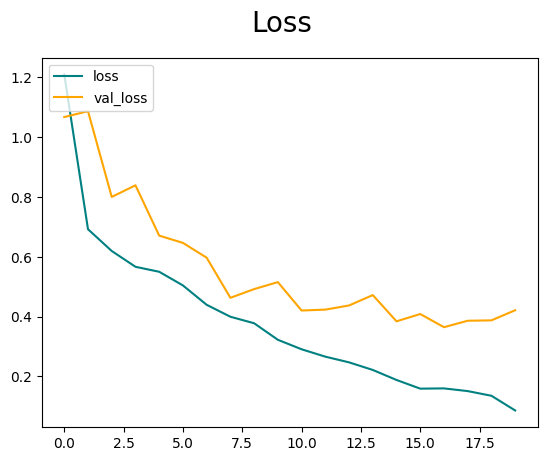

In [9]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

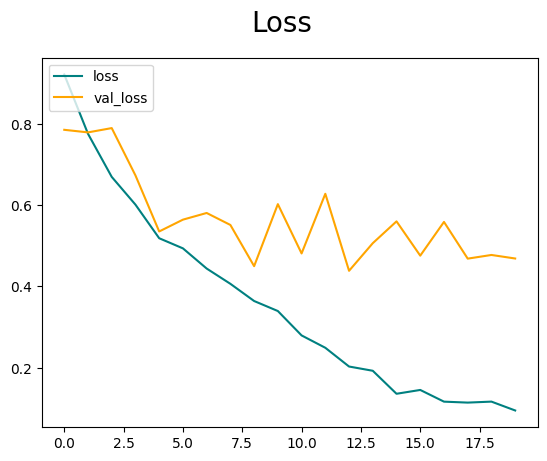

In [9]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

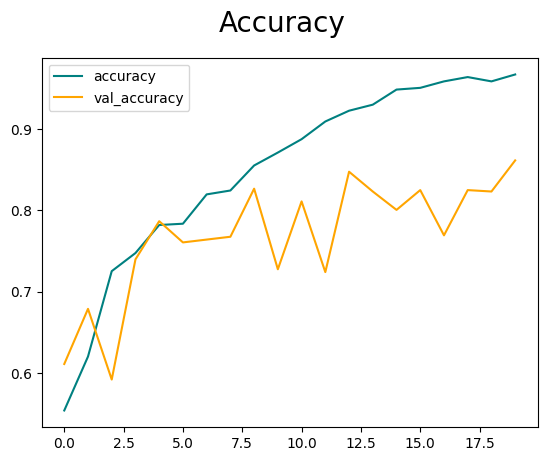

In [10]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [11]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
acc = SparseCategoricalAccuracy()
pre = Precision()
re = Recall()

In [12]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    # Convert yhat to sparse labels before updating metrics
    yhat_sparse = np.argmax(yhat, axis=1)
    acc.update_state(y, yhat_sparse) # Update with sparse labels
    pre.update_state(y, yhat_sparse) # Update with sparse labels
    re.update_state(y, yhat_sparse) # Update with sparse labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


In [13]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8113207817077637, Recall:0.8269230723381042, Accuracy:0.19298245012760162


In [36]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Define class names in the same order as your dataset
class_names = ['digital_art', 'painting', 'sculpture']  # Define class_names here

# Function to preprocess and predict image class
def predict_image(trained_model, img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(256, 256))  # Resize to model input shape
    img_array = image.img_to_array(img)  # Convert to NumPy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values (same as training)

    # Make a prediction
    predictions = trained_model.predict(img_array)  # Get probabilities
    predicted_class = np.argmax(predictions[0])  # Get index of highest probability
    confidence = np.max(predictions[0])  # Confidence score

    # Print the result
    print(f"Predicted class: {class_names[predicted_class]} (Confidence: {confidence:.2f})")

# Example usage:
# Assuming 'model' is your trained CNN model and 'class_names' is defined
predict_image(model, "dataset/training_set/sculpture/i - 400.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted class: sculpture (Confidence: 0.98)


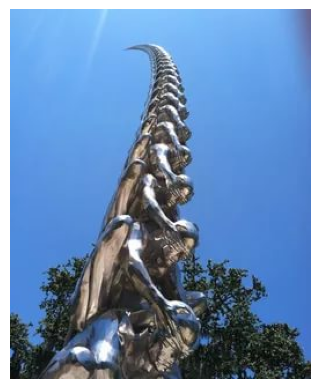

In [37]:
import matplotlib.pyplot as plt
import cv2

def display_image(image_path):
  """Displays an image using matplotlib."""
  try:
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    plt.show()
  except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
  except Exception as e:
    print(f"Error: Could not display image: {e}")

# Example usage:
image_path = "dataset/training_set/sculpture/i - 400.png"  # Replace with your image path
display_image(image_path)

In [19]:
#  SAVIN THE MODEL

from tensorflow.keras.models import load_model
model.save(os.path.join('models','Selfimageclassifier.h5'))

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

#  Load the trained model (Ensure correct path)
model = tf.keras.models.load_model("models/Selfimageclassifier.h5")

#  Print model summary to verify input shape
model.summary()
print(f"Model expected input shape: {model.input_shape}")

#  Ensure correct image size (256x256 since your model was trained on this size)
IMG_SIZE = 256  

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))  # Resize correctly
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize
    return img_array



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,697,141 (14.10 MB)

 Trainable params: 3,697,139 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model expected input shape: (None, 256, 256, 3)


In [1]:
#  Load and preprocess the image
img_path = 'test_set/35.png'  # Replace with your image path
img_array = preprocess_image(img_path)

#  Debug shape mismatch
print(f"Image shape after preprocessing: {img_array.shape}")  # Should be (1, 256, 256, 3)

#  Make the prediction
predictions = model.predict(img_array)

#  Get the predicted class
predicted_class = np.argmax(predictions, axis=1)[0]

#  Ensure class names match what was used in training
class_names = ['digital_art', 'painting', 'sculpture']  # Ensure these match training labels
predicted_label = class_names[predicted_class]

#  Display results
print(f"The predicted class for the image is: {predicted_label}")

#  Show the image with prediction
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


NameError: name 'preprocess_image' is not defined